In [38]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, fcluster,dendrogram
from scipy.spatial.distance import pdist, squareform
from matplotlib import pyplot as plt

# 导入数据
data = pd.read_csv('expenditure.CSV')
data = data.to_numpy().T
# 标准化数据（均值为0，标准差为1）
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [45]:
# 计算欧氏距离（L2范数）
distance_matrix = pdist(data_scaled, metric='euclidean')
print("压缩距离矩阵:\n", distance_matrix)

压缩距离矩阵:
 [4.0709669  6.60223647 6.51872852 5.71936767 4.98794543 4.89196066
 4.99189469 3.2830495  4.08818119 3.58617967 5.30196214 5.47311405
 6.22265839 4.93126774 6.08468177 3.01948978 3.21619673 2.2888603
 2.26403087 2.99739614 2.69161043 4.32475824 1.89255545 1.54312657
 3.58141086 3.87273281 3.82676065 1.32533558 2.98836524 1.17499323
 1.37256539 3.61902975 3.94958117 2.65897676 6.80998258 2.83773135
 3.57306849 3.41546656 3.62905019 3.10709474 2.0358545  1.02570676
 1.22911935 4.1890015  4.19526984 2.73464916 7.06602472 2.99331961
 3.78370329 3.62299512 3.95124794 3.54904638 2.5665008  1.03751542
 3.06823047 3.1812431  2.18729246 6.13970397 2.19246751 2.71914112
 2.98724269 3.3362986  2.94371916 1.67998636 1.35075591 1.88428645
 2.89327333 4.88697275 2.63023435 2.07003034 3.19276765 3.23286108
 3.00749562 1.94968473 3.79119941 2.1358638  5.42969691 2.38419376
 2.2885694  2.10755604 2.25421435 2.18141438 2.66896514 3.73980261
 6.011363   1.60309376 2.57243868 1.75675975 1.9479083

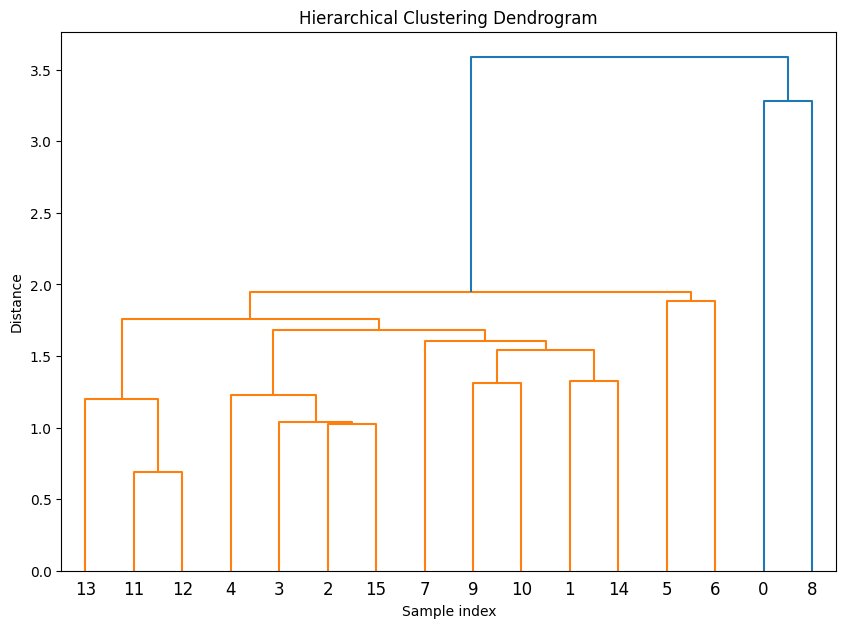

Z:
 [[11.   12.    0.69  2.  ]
 [ 2.   15.    1.03  2.  ]
 [ 3.   17.    1.04  3.  ]
 [13.   16.    1.2   3.  ]
 [ 4.   18.    1.23  4.  ]
 [ 9.   10.    1.31  2.  ]
 [ 1.   14.    1.33  2.  ]
 [21.   22.    1.54  4.  ]
 [ 7.   23.    1.6   5.  ]
 [20.   24.    1.68  9.  ]
 [19.   25.    1.76 12.  ]
 [ 5.    6.    1.88  2.  ]
 [26.   27.    1.95 14.  ]
 [ 0.    8.    3.28  2.  ]
 [28.   29.    3.59 16.  ]]
f:
 [8 4 2 2 2 6 7 5 9 3 3 1 1 1 4 2]
每一步的最小距离: [0.6875 1.0257 1.0375 1.202  1.2291 1.3086 1.3253 1.5431 1.6031 1.68
 1.7568 1.8843 1.9497 3.283  3.5862]


In [46]:
# 计算链接矩阵（linkage matrix）
Z = linkage(distance_matrix, method='single', metric='euclidean')
f = fcluster(Z, t=1.5, criterion='distance')

# 绘制树状图（dendrogram）
fig = plt.figure(figsize=(10, 7))
dn = dendrogram(Z)

# 显示图形
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()
# 打印链接矩阵Z，保留两位小数
print('Z:\n', np.round(Z, 2))
print('f:\n', f)
min_distances = Z[:, 2]  # 第3列为每一步的最小距离
print("每一步的最小距离:", np.round(min_distances, 4))